In [ ]:
import os
os.getcwd()


'C:\\Users\\Idriss'

In [ ]:

os.getcwd()


'A:\\coding'

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset
df=pd.read_csv('dataR2.csv')

In [ ]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.1 KB


In [ ]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [ ]:
df.rename(columns={'Classification':'target'},inplace='true')

        
df.sample(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,target
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1
96,44,27.887617,99,9.208,2.248594,12.6757,5.478170,23.03306,407.206,2
79,41,26.672763,97,22.033,5.271762,44.7059,13.494865,27.83250,783.796,2
30,66,36.212279,101,15.533,3.869788,74.7069,7.539550,22.32024,864.968,1
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.10000,263.499,1


In [ ]:
df.target =df.target-1

In [ ]:
df.sample(5)
df.shape

(116, 10)

In [ ]:

df['target'].value_counts()
# 1 if cancer, 0 else
#64 cancer vs 52 no_cancer
#df.dtypes

1    64
0    52
Name: target, dtype: int64

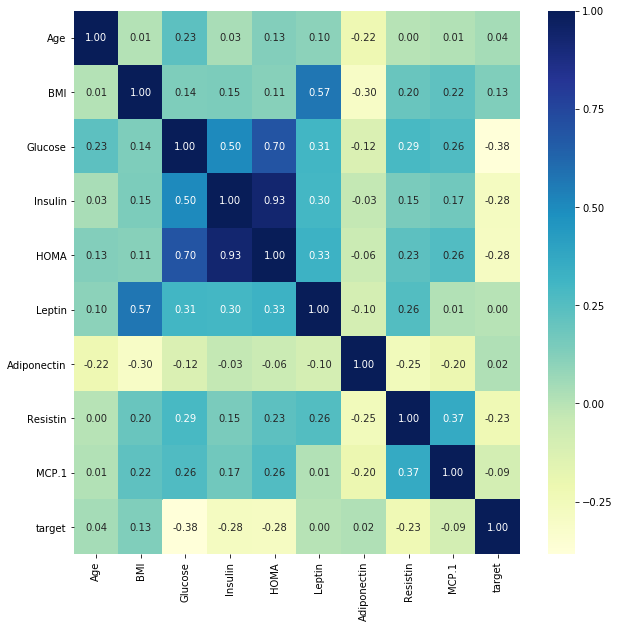

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f')


C:\Users\Idriss\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Idriss\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Idriss\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "

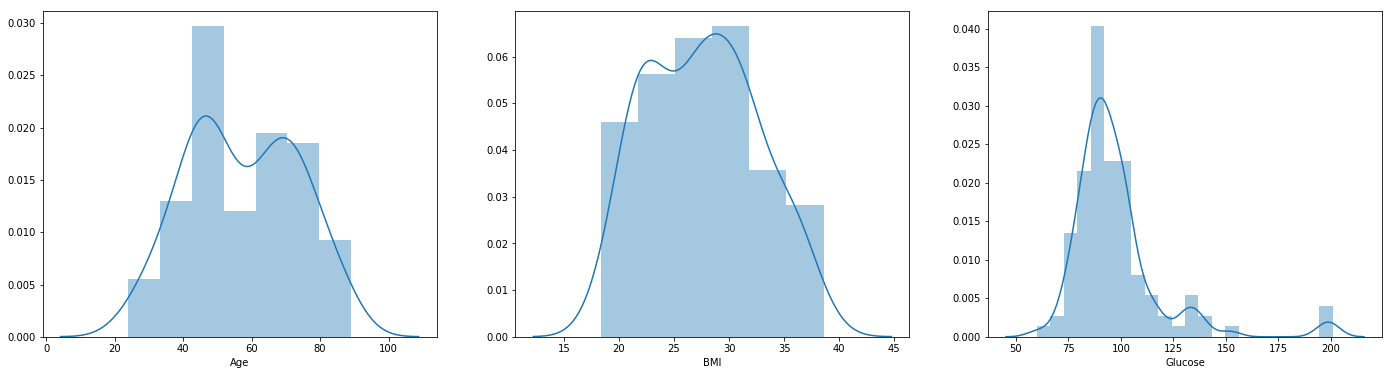

In [ ]:

#df['age_classes']
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3,1)
sns.distplot(df['Age'],kde='true')
plt.subplot(1,3,2)
sns.distplot(df['BMI'],kde='true')
plt.subplot(1,3,3)
sns.distplot(df['Glucose'],kde='true')

In [ ]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,target
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


In [ ]:
bins_age=[24,45,56,71,89]
bins_bmi=[18.37,23,30,40]
bins_glucose=[60,85,92,105,201]
df['age_class']=pd.cut(df['Age'],bins=bins_age)
df['bmi_class']=pd.cut(df['BMI'],bins=bins_bmi)
df['glucose_class']=pd.cut(df['Glucose'],bins=bins_glucose)
df.tail(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,target,age_class,bmi_class,glucose_class
106,45,29.384757,90,4.713,1.046286,23.8479,6.644245,15.55625,621.273,1,"(24, 45]","(23.0, 30.0]","(85, 92]"
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.89000,209.190,1,"(45, 56]","(30.0, 40.0]","(85, 92]"
108,68,35.560000,131,8.150,2.633537,17.8700,11.900000,4.19000,198.400,1,"(56, 71]","(30.0, 40.0]","(105, 201]"
109,75,30.480000,152,7.010,2.628283,50.5300,10.060000,11.73000,99.450,1,"(71, 89]","(30.0, 40.0]","(105, 201]"
110,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280,1,"(45, 56]","(30.0, 40.0]","(105, 201]"
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1,"(24, 45]","(23.0, 30.0]","(85, 92]"
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1,"(56, 71]","(23.0, 30.0]","(92, 105]"
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1,"(56, 71]","(30.0, 40.0]","(92, 105]"
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1,"(71, 89]","(23.0, 30.0]","(60, 85]"
115,86,27.180000,138,19.910,6.777364,90.2800,14.110000,4.35000,90.090,1,"(71, 89]","(23.0, 30.0]","(105, 201]"


Text(0.5,1,'Glucose vs Cancer')

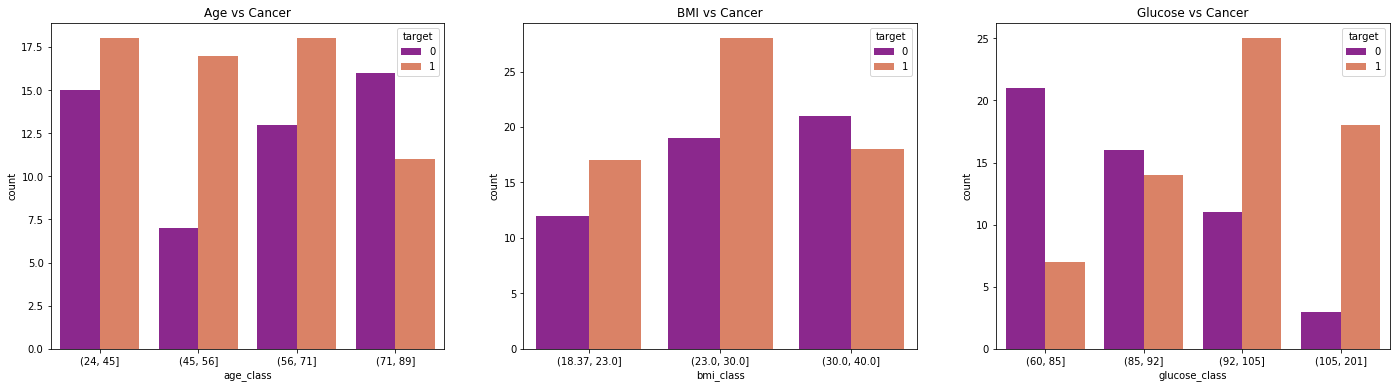

In [ ]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3,1)
g2=sns.countplot(x='age_class',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Age vs Cancer")
plt.subplot(1, 3,2)
g2=sns.countplot(x='bmi_class',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("BMI vs Cancer")
plt.subplot(1, 3,3)
g2=sns.countplot(x='glucose_class',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Glucose vs Cancer")

##### Analyse of the graphs
people between 45 and 60 years old are more likely to have cancer, and people with more than 90g/l of glucose

In [ ]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,target
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


In [ ]:
bins_insul=[2.432000,4.359250,5.924500,11.189250,58.460000]
bins_homa=[0.467409,0.917966,1.380939,2.857787,25.050342]
bins_leptin=[4.311000,12.313675,20.271,37.3783,90.280]
df['insul_class']=pd.cut(df['Insulin'],bins=bins_insul)
df['homa_class']=pd.cut(df['HOMA'],bins=bins_homa)
df['leptin_class']=pd.cut(df['Leptin'],bins=bins_leptin)

Text(0.5,1,'Leptin vs Cancer')

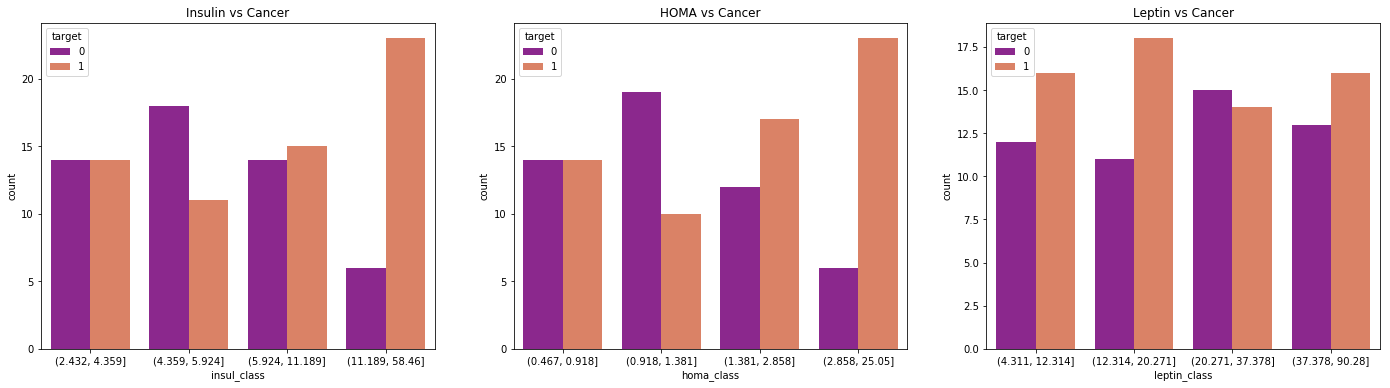

In [ ]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3,1)
g2=sns.countplot(x='insul_class',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Insulin vs Cancer")
plt.subplot(1, 3,2)
g2=sns.countplot(x='homa_class',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("HOMA vs Cancer")
plt.subplot(1, 3,3)
g2=sns.countplot(x='leptin_class',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Leptin vs Cancer")

##### Analyse of results: people with high level of insulin or Homa have much chance to get cancer

In [ ]:
#plt.pie(x='homa_class',data=df)
#Logistic2.coef_

In [ ]:
#df.plot.scatter(x='Age', y='target')

In [ ]:
df.sample()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,target,age_class,bmi_class,glucose_class,insul_class,homa_class,leptin_class
24,54,30.483158,90,5.537,1.229214,12.331,9.73138,10.19299,1227.91,1,"(45, 56]","(30.0, 40.0]","(85, 92]","(4.359, 5.924]","(0.918, 1.381]","(12.314, 20.271]"


In [ ]:
df=df.drop(['age_class','bmi_class','glucose_class','insul_class','homa_class','leptin_class'],axis=1)

In [ ]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,target
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X.shape, print(y.shape)

(116,)


((116, 9), None)

In [ ]:
#split into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#Feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression 
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#Prediction
y_pred=Logistic.predict(X_test)

In [ ]:
#score logistic regression
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
#score=accuracy_score(y_test,y_pred)
#k_fold cross_validation 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Logistic,X=X_train,y=y_train,cv=10)

[[ 6  4]
 [ 2 12]]


In [ ]:
#score logistic regression
accuracy_score(y_test,y_pred)

0.75

In [ ]:
Logistic.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [ ]:

print('Standard deviation: ',scores.std(),'accuracy : ',scores.mean())

Standard deviation:  0.09216865914395773 accuracy :  0.7366666666666666


In [ ]:
from sklearn.model_selection import GridSearchCV
C_grid=np.arange(10,20,0.001)
penalty=['l1','l2']
parameters=[{'C':C_grid,'penalty':penalty}]
grid_searchcv=GridSearchCV(estimator=Logistic,param_grid=parameters,cv=10,scoring='accuracy',n_jobs=-1)
best_model=grid_searchcv.fit(X_train,y_train)

In [ ]:

print('our best hyperparameters: ', best_model.best_params_,'best_score ',best_model.best_score_)

our best hyperparameters:  {'C': 10.0, 'penalty': 'l1'} best_score  0.7391304347826086


In [ ]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,target
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [ ]:
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
y_knn_pred=knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
score_knn=accuracy_score(y_test,y_knn_pred)
cm_knn=confusion_matrix(y_test,y_knn_pred)

In [ ]:
print(score)
cm_knn

0.75


array([[ 6,  4],
       [ 2, 12]], dtype=int64)

In [ ]:
from sklearn.svm import SVC 

In [ ]:
svc_classifier=SVC(kernel='linear')

In [ ]:
svc_classifier.fit(X_train,y_train)
y_svc_pred=svc_classifier.predict(X_test)
accuracy_score(y_test,y_svc_pred)

0.75

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

sequential=Sequential()
sequential.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=9))

#ajout de la deuxiième couche cachée
sequential.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))

#Ajout de la couche de sortie
sequential.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
#Compiler le RN
sequential.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Entrainement du RN
sequential.fit(X_train,y_train,batch_size=10,epochs=100)

C:\Users\Idriss\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
92/92 [==============================] - 1s 9ms/step - loss: 0.6932 - acc: 0.4348
Epoch 2/100
92/92 [==============================] - 0s 119us/step - loss: 0.6931 - acc: 0.5435
Epoch 3/100
92/92 [==============================] - 0s 109us/step - loss: 0.6930 - acc: 0.5435
Epoch 4/100
92/92 [==============================] - 0s 108us/step - loss: 0.6928 - acc: 0.5435
Epoch 5/100
92/92 [==============================] - 0s 108us/step - loss: 0.6924 - acc: 0.5435
Epoch 6/100
92/92 [==============================] - 0s 108us/step - loss: 0.6919 - acc: 0.5435
Epoch 7/100
92/92 [==============================] - 0s 98us/step - loss: 0.6912 - acc: 0.5435
Epoch 8/100
92/92 [==============================] - 0s 119us/step - loss: 0.6897 - acc: 0.5435
Epoch 9/100
92/92 [==============================] - 0s 97us/step - loss: 0.6880 - acc: 0.5435
Epoch 10/100
92/92 [==============================] - 0s 119us/step - loss: 0.6860 - acc: 0.5435
Epoch 11/100
92/92 [=======================

92/92 [==============================] - 0s 98us/step - loss: 0.3918 - acc: 0.8370
Epoch 87/100
92/92 [==============================] - 0s 87us/step - loss: 0.3905 - acc: 0.8370
Epoch 88/100
92/92 [==============================] - 0s 108us/step - loss: 0.3881 - acc: 0.8370
Epoch 89/100
92/92 [==============================] - 0s 76us/step - loss: 0.3867 - acc: 0.8370
Epoch 90/100
92/92 [==============================] - 0s 98us/step - loss: 0.3858 - acc: 0.8370
Epoch 91/100
92/92 [==============================] - 0s 87us/step - loss: 0.3848 - acc: 0.8478
Epoch 92/100
92/92 [==============================] - 0s 98us/step - loss: 0.3828 - acc: 0.8370
Epoch 93/100
92/92 [==============================] - 0s 87us/step - loss: 0.3819 - acc: 0.8370
Epoch 94/100
92/92 [==============================] - 0s 87us/step - loss: 0.3796 - acc: 0.8370
Epoch 95/100
92/92 [==============================] - 0s 87us/step - loss: 0.3786 - acc: 0.8370
Epoch 96/100
92/92 [==============================] 

In [ ]:
y_pred_ann=(sequential.predict(X_test)>0.5)*1

In [ ]:
cm_ann=confusion_matrix(y_test,y_pred_ann)
cm_ann

array([[ 7,  3],
       [ 3, 11]], dtype=int64)

In [ ]:
acc_ann=accuracy_score(y_test,y_pred_ann)

In [ ]:
acc_ann

0.75